### Iris Species predictor!!!

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

In [205]:
data=pd.read_csv(r"C:\\Users\\Shree and Co\\Desktop\\DatasetsCC\\Iris.csv")

In [206]:
data.shape

(150, 6)

In [207]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


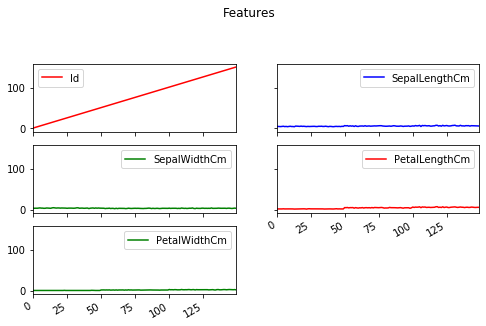

In [208]:
data.plot(kind="line", subplots=True, grid=False, title="Features",
        layout=(5,2), sharex=True, sharey=True, legend=True,figsize=(8,8),    
        style=['r', 'b', 'g', 'r', 'g', 'b']);

### Feature Importance:

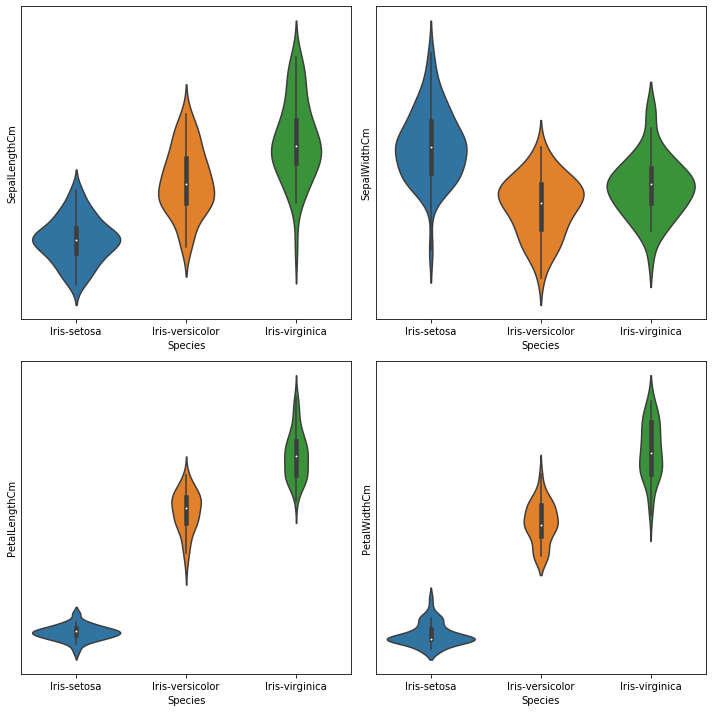

In [209]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.violinplot(data.Species,data.SepalLengthCm,ax=axes[0,0])
sns.violinplot(data.Species,data.SepalWidthCm,ax=axes[0,1])
sns.violinplot(data.Species,data.PetalLengthCm,ax=axes[1,0])
sns.violinplot(data.Species,data.PetalWidthCm,ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()

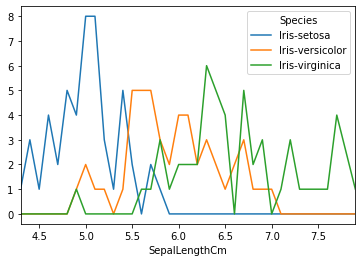

In [210]:
df1=pd.crosstab(data["SepalLengthCm"],data["Species"]).plot();

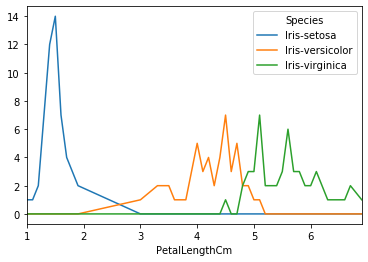

In [211]:
df2=pd.crosstab(data["PetalLengthCm"],data["Species"]).plot();

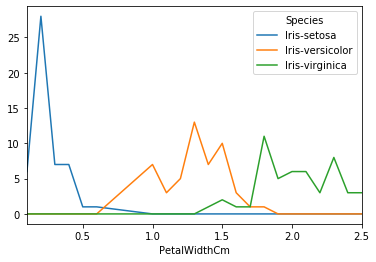

In [212]:
df3=pd.crosstab(data["PetalWidthCm"],data["Species"]).plot();

### SVC Model

In [213]:
svc=SVC(gamma="scale")

In [214]:
data.head(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa


In [215]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [216]:
np.random.seed(98)
x=data.drop("Species",axis=1)
y=data["Species"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [217]:
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [218]:
y_preds=svc.predict(x_test)
y_unique=np.unique(y_preds)
y_unique

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [219]:
y_test

70     Iris-versicolor
96     Iris-versicolor
94     Iris-versicolor
52     Iris-versicolor
46         Iris-setosa
78     Iris-versicolor
72     Iris-versicolor
97     Iris-versicolor
102     Iris-virginica
14         Iris-setosa
77     Iris-versicolor
53     Iris-versicolor
90     Iris-versicolor
41         Iris-setosa
56     Iris-versicolor
140     Iris-virginica
111     Iris-virginica
75     Iris-versicolor
87     Iris-versicolor
76     Iris-versicolor
98     Iris-versicolor
116     Iris-virginica
18         Iris-setosa
5          Iris-setosa
128     Iris-virginica
10         Iris-setosa
29         Iris-setosa
82     Iris-versicolor
122     Iris-virginica
8          Iris-setosa
Name: Species, dtype: object

In [220]:
svc_score=svc.score(x_test,y_test)

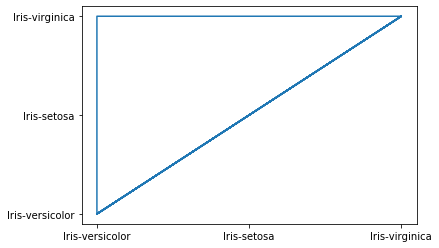

In [221]:
plt.plot(y_test,y_preds);

##### Classification report of SVC model

In [222]:
print(classification_report(y_test,y_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.98      0.96        30
   weighted avg       0.97      0.97      0.97        30



##### Confusion matrix of SVC

In [223]:
print(confusion_matrix(y_test,y_preds))

[[ 8  0  0]
 [ 0 15  1]
 [ 0  0  6]]


(3.0, 0.0)

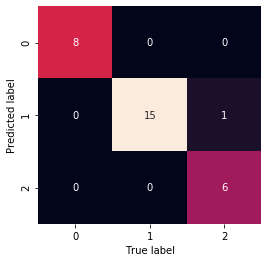

In [224]:
fig,ax=plt.subplots(figsize=(4,4))
ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")

bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)


### RandomForestClassifier Model

In [225]:
rc=RandomForestClassifier(n_estimators=100)

In [226]:
rc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [227]:
y_pre=rc.predict(x_test)

In [228]:
rc_score=rc.score(x_test,y_test)

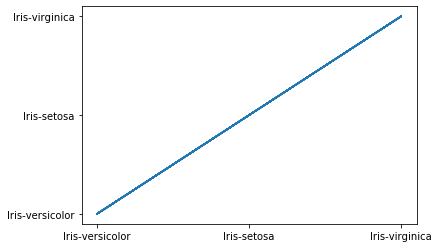

In [229]:
plt.plot(y_test,y_pre);

##### Classification report of RF model

In [230]:
print(classification_report(y_test,y_pre))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



##### Confusion matrix of RF

In [231]:
print(confusion_matrix(y_test,y_pre))

[[ 8  0  0]
 [ 0 16  0]
 [ 0  0  6]]


(3.0, 0.0)

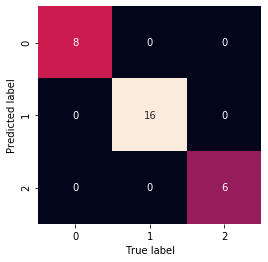

In [232]:
fig,ax=plt.subplots(figsize=(4,4))
ax=sns.heatmap(confusion_matrix(y_test,y_pre),annot=True,cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")

bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)


#### Comparing the 2 models

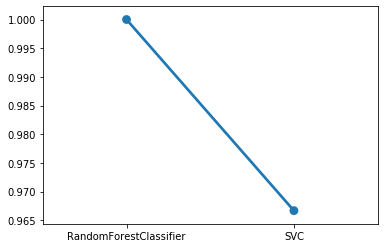

In [233]:
scores=[rc_score,svc_score]
models=["RandomForestClassifier", "SVC"]
sns.pointplot(models,scores);